### Instructor Demo: Stock Price Simulation

This program executes a single simulation of stock price trajectory over the next `252` trading days (or year of trading), based on a normal probability distribution of average daily returns derived from the sample mean and standard deviation.

In [1]:
# Import libraries and dependencies
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
from iexfinance.stocks import get_historical_data
import iexfinance as iex
import matplotlib.pyplot as plt
%matplotlib inline

### Check Available Tickers from IEX

In [2]:
# Return available tickers from API
tickers=pd.DataFrame(iex.refdata.get_symbols())
tickers.head()

,date,iexId,isEnabled,name,symbol,type
0,2019-06-07,2,True,Agilent Technologies Inc.,A,cs
1,2019-06-07,12042,True,Alcoa Corporation,AA,cs
2,2019-06-07,14924,True,Perth Mint Physical Gold,AAAU,N/A
3,2019-06-07,7653,True,Altaba Inc.,AABA,cs
4,2019-06-07,9169,True,AAC Holdings Inc.,AAC,cs


### Get 1 Year's Worth of Data via SDK/API Call and Read in as DataFrame 

In [3]:
# Set the ticker
ticker = "AAPL"

# Set start and end datetimes of 1 year, between now and 365 days ago.
end_date = datetime.now()
start_date = end + timedelta(-365)

# Get 1 year's worth of historical data for AAPL
df = get_historical_data(ticker, start_date, end_date,  output_format='pandas')
df.head()

,open,high,low,close,volume
date,,,,,
2018-06-07,191.2290,191.2881,189.4511,190.5592,21347180
2018-06-08,188.3036,189.1211,186.9246,188.8256,26656799
2018-06-11,188.4809,189.0916,187.3580,188.3627,18308460
2018-06-12,188.5153,189.7230,188.2839,189.3969,16911141
2018-06-13,189.5348,189.9879,187.5845,187.8406,21638393


### Drop Extraneous Columns

In [4]:
# Use the `drop` function to drop extra columns in the DataFrame
df.drop(columns=['open', 'high', 'low', 'volume'], inplace=True)
df.head()

,close
date,
2018-06-07,190.5592
2018-06-08,188.8256
2018-06-11,188.3627
2018-06-12,189.3969
2018-06-13,187.8406


### Calculate Daily Returns

In [5]:
# Use the `pct_change` function to calculate daily returns of AAPL
daily_returns = df.pct_change()
daily_returns.head()

,close
date,
2018-06-07,NaN
2018-06-08,-0.009097
2018-06-11,-0.002451
2018-06-12,0.005490
2018-06-13,-0.008217


### Calculate Value of Average Daily Returns

In [6]:
# Use the `mean` function to calculate the mean of daily returns for AAPL
avg_daily_return = daily_returns.mean()['close']
avg_daily_return

7.627750989982785e-05

### Calculate Value of Standard Deviation of Daily Returns

In [7]:
# Use the `std` function to calculate the standard deviation of daily returns for AAPL
std_dev_daily_return = daily_returns.std()['close']
std_dev_daily_return

0.01946179286314129

### Run the Monte Carlo Simulation and Save Results to DataFrame

In [8]:
# Set number of trading days and get last closing price of AAPL from DataFrame
num_trading_days = 252
aapl_last_price = df['close'][-1]

# Initialize the simulated prices list with the last closing price of AAPL
simulated_aapl_prices = [aapl_last_price]

# Simulate the returns for 252 days
for i in range(num_trading_days):
    # Calculate the simulated price using the last price within the list
    simulated_price = simulated_aapl_prices[-1] * (1 + np.random.normal(avg_daily_return, std_dev_daily_return))
    # Append the simulated price to the list
    simulated_aapl_prices.append(simulated_price)
    
# Create a DataFrame of the simulated prices
simulated_price_df = pd.DataFrame({
    "Simulated AAPL Prices": simulated_aapl_prices
})

# Print head of DataFrame
simulated_price_df.head()

,Simulated AAPL Prices
0,185.220000
1,193.103075
2,194.717333
3,195.730977
4,200.232098


### Plot the Simulated Stock Price Trajectory for AAPL over the Next Year (252 Trading Days)

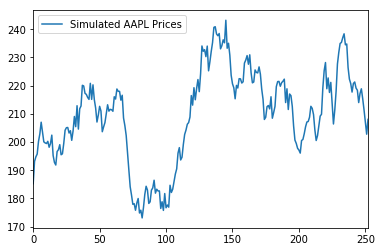

In [9]:
# Use the `plot` function to plot the trajectory of AAPL stock based on a 252 trading day simulation
simulated_price_df.plot()

### Calculate Daily Returns of Simulated Stock Prices for AAPL

In [10]:
# Use the `pct_change` function to calculate daily returns of simulated stock prices for AAPL
simulated_daily_returns = simulated_price_df.pct_change()
simulated_daily_returns.head()

,Simulated AAPL Prices
0,NaN
1,0.042561
2,0.008360
3,0.005206
4,0.022996


### Calculate the Cumulative Returns of Simulated Stock Prices for AAPL

In [17]:
# Use the `cumprod` function to calculate the cumulative returns of simulated stock prices for AAPL
simulated_cumulative_returns = (1 + simulated_daily_returns).cumprod()
simulated_cumulative_returns.head()

,Simulated AAPL Prices
0,NaN
1,1.042561
2,1.051276
3,1.056749
4,1.081050


### Calculate the Cumulative Profits/Losses of Simulated Stock Prices for AAPL

In [18]:
# Multiply an initial investment by the cumulative returns of simulative stock prices to
# return the progression of cumulative returns in terms of money
initial_investment = 10000
cumulative_pnl = initial_investment * simulated_cumulative_returns
cumulative_pnl.head()

,Simulated AAPL Prices
0,NaN
1,10425.606062
2,10512.759557
3,10567.486092
4,10810.500931


### Plot the Cumulative Profits/Losses of `$10,000` in AAPL Over the Next `252` Trading Days

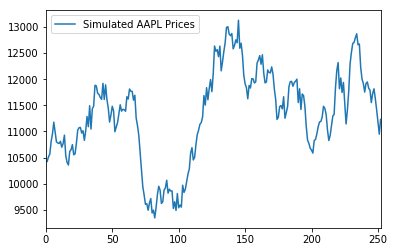

In [19]:
# Use the 'plot' function to create a chart of the cumulative profits/losses
cumulative_pnl.plot()